In [1]:
# 한글, 음수 시각화 설정

#시각화 패키지
import matplotlib.pyplot as plt

#시각화에서 한글을 사용하기 위한 설정
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
    
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
    
#시각화에서 음수를 표현하기 위한 설정
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False 

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('../data/process_extraction_mean_df.csv', index_col= 0)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 8145 entries, 2016-01-01 07 to 2016-12-31 23
Columns: 208 entries, LIFT.OUT.ROL.MTR.M.SPD to R.Vac
dtypes: float64(202), int64(6)
memory usage: 13.0+ MB


,LIFT.OUT.ROL.MTR.M.SPD,LEHR.DRV.MTR.M.SPD,DRV.MTR.M.SPD,X,DCS.Offset.RPM.M,DAMP.POSITION.BAY.CTRL,DB.N2.SCREEN.FLOW.LEFT,DB.N2.SCREEN.FLOW.RIGHT,N2.TO.EA1313A,ROOF.HEATING.Zone,...,ROLLDOWN.폐기.RIGHT.,진공패드.폐기.RIGHT.,폐기율...,ROLLDOWN.진공패드.폐기율..LEFT.,ROLLDOWN.진공패드.폐기율..RIGHT.,ROLLDOWN.진공패드.폐기율..전체.,L.RD,L.Vac,R.RD,R.Vac
dat...date.name.,,,,,,,,,,,,,,,,,,,,,
2016-01-01 07,-1.742443,-1.699444,-1.683797,-0.755452,-1.947792,-1.251006,-1.514135,-1.529208,-0.218748,0.040366,...,8,3,11.69,8.75,14.86,11.69,0.025,0.063,0.108,0.041
2016-01-01 08,-1.744941,-1.699677,-1.685770,-0.755452,-1.947792,-1.251006,-1.514135,-1.529208,-0.218748,0.028982,...,10,0,7.19,2.17,13.33,7.19,0.000,0.022,0.133,0.000
2016-01-01 09,-1.744941,-1.699677,-1.685770,-0.755452,-1.947792,-1.251006,-1.514135,-1.529208,-0.218748,0.065345,...,0,0,3.85,7.81,0.00,3.85,0.016,0.063,0.000,0.000
2016-01-01 10,-1.744941,-1.699677,-1.685770,-0.755452,-1.947792,-1.251006,-1.514135,-1.529208,-0.218748,0.084378,...,0,0,4.96,10.29,0.00,4.96,0.000,0.103,0.000,0.000
2016-01-01 11,-1.744941,-1.699677,-1.685770,-0.755452,-1.947792,-1.251006,-1.514135,-1.529208,-0.218748,0.024016,...,0,0,0.00,0.00,0.00,0.00,0.000,0.000,0.000,0.000


In [15]:
feature_df = df.iloc[:, :-14]
target_df = df[['L.RD', 'L.Vac', 'R.RD', 'R.Vac']]

In [16]:
feature_df.info() # 827 > 195
target_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8145 entries, 2016-01-01 07 to 2016-12-31 23
Columns: 194 entries, LIFT.OUT.ROL.MTR.M.SPD to STD.GLS.R
dtypes: float64(194)
memory usage: 12.1+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 8145 entries, 2016-01-01 07 to 2016-12-31 23
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   L.RD    8145 non-null   float64
 1   L.Vac   8145 non-null   float64
 2   R.RD    8145 non-null   float64
 3   R.Vac   8145 non-null   float64
dtypes: float64(4)
memory usage: 318.2+ KB


> ### 기초 통계 확인

In [17]:
feature_df.info()
feature_df.describe() # 한 눈에 확인 불가

<class 'pandas.core.frame.DataFrame'>
Index: 8145 entries, 2016-01-01 07 to 2016-12-31 23
Columns: 194 entries, LIFT.OUT.ROL.MTR.M.SPD to STD.GLS.R
dtypes: float64(194)
memory usage: 12.1+ MB


,LIFT.OUT.ROL.MTR.M.SPD,LEHR.DRV.MTR.M.SPD,DRV.MTR.M.SPD,X,DCS.Offset.RPM.M,DAMP.POSITION.BAY.CTRL,DB.N2.SCREEN.FLOW.LEFT,DB.N2.SCREEN.FLOW.RIGHT,N2.TO.EA1313A,ROOF.HEATING.Zone,...,S.C.RET.L,S.C.RET.R,S.RET.F.L,S.RET.F.R,STD.U.L,STD.U.R,STD.L.L,STD.L.R,STD.GLS.L,STD.GLS.R
count,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,...,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000
mean,0.000662,0.000645,0.000654,-0.000383,-0.000148,0.000430,-0.000921,-0.000896,-0.001064,-0.000307,...,-0.001295,-0.001154,0.000231,-0.000139,0.000351,0.000007,0.000248,0.000409,-0.000434,-0.000518
std,0.998017,0.985612,0.987703,0.633824,0.551058,0.983083,0.999936,0.999962,0.999770,0.242344,...,0.999453,0.999653,1.000398,1.000417,1.000357,1.000429,1.000390,1.000314,1.000320,1.000272
min,-1.744941,-1.699677,-1.685770,-3.922306,-3.684494,-1.257404,-2.192917,-2.212842,-2.404087,-1.019054,...,-2.837239,-2.791801,-2.089899,-2.103838,-4.751181,-5.352458,-10.387414,-11.711583,-4.945022,-4.855583
25%,-0.829344,-0.808054,-0.806562,-0.108501,0.172236,-1.218385,-0.576769,-0.585142,-0.218748,-0.206331,...,-0.584210,-0.572411,-0.791508,-0.816257,-0.606497,-0.584984,-0.521254,-0.516138,-0.690049,-0.718528
50%,-0.387797,-0.709863,-0.720933,0.324264,0.172236,-0.009039,0.392919,0.391479,-0.218748,0.043115,...,-0.037196,0.006448,-0.128965,-0.238991,-0.163625,-0.075450,0.188128,0.044225,-0.130653,-0.134253
75%,1.226772,1.227415,1.232715,0.326453,0.172236,0.896859,0.554534,0.554249,-0.218748,0.146916,...,0.508663,0.539875,0.501239,0.717411,0.642474,0.543196,0.693338,0.646202,0.440057,0.485630
max,2.622835,2.555939,2.542374,0.789370,0.172236,1.431630,1.394930,1.400653,3.909113,3.403204,...,2.901317,2.704696,3.124881,2.857152,9.969453,10.363894,4.609240,4.508690,7.669278,7.949552


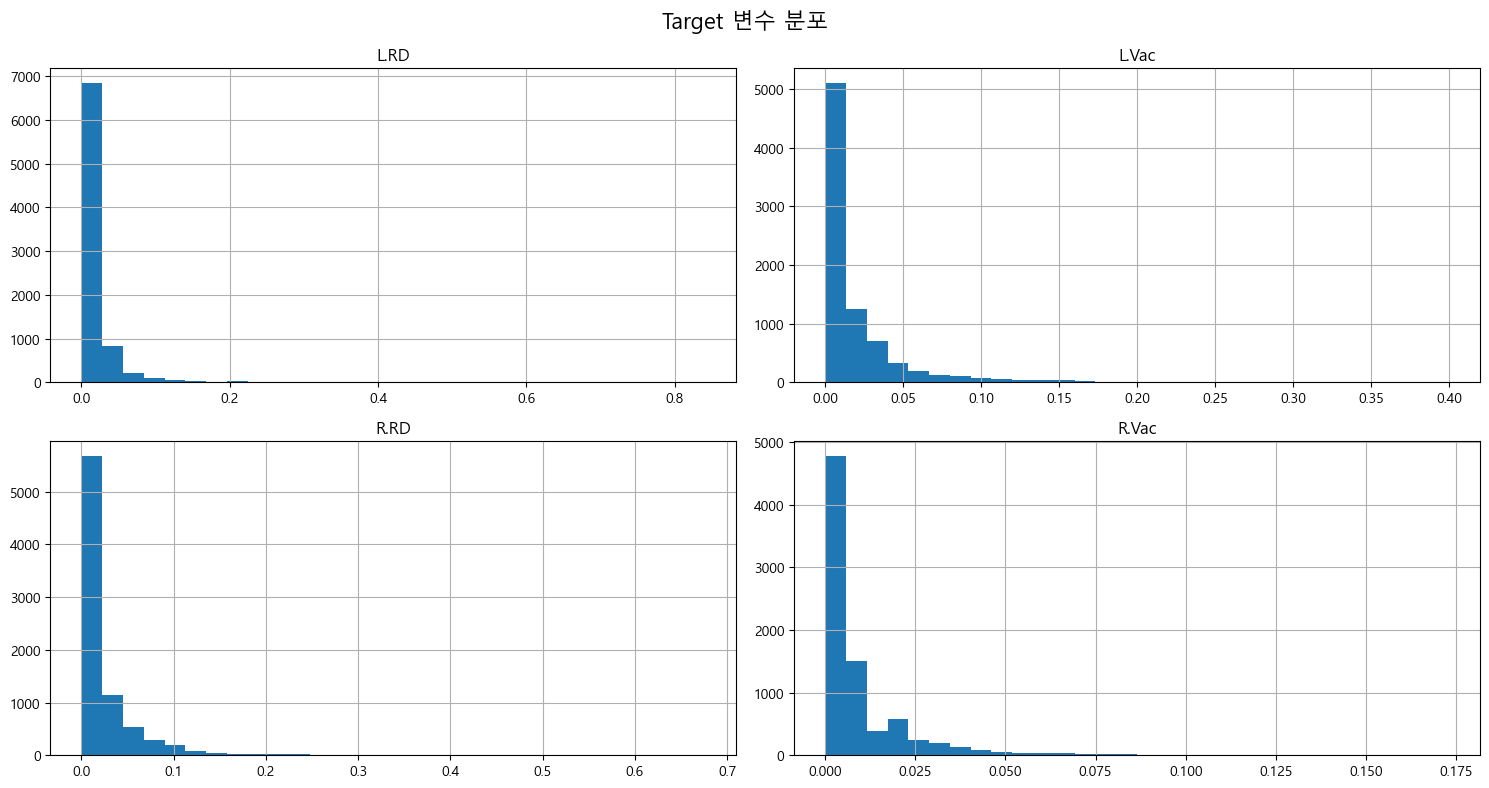

In [18]:
import matplotlib.pyplot as plt

target_df.hist(figsize=(15, 8), bins=30)
plt.suptitle("Target 변수 분포", fontsize=16)
plt.tight_layout()
plt.show()

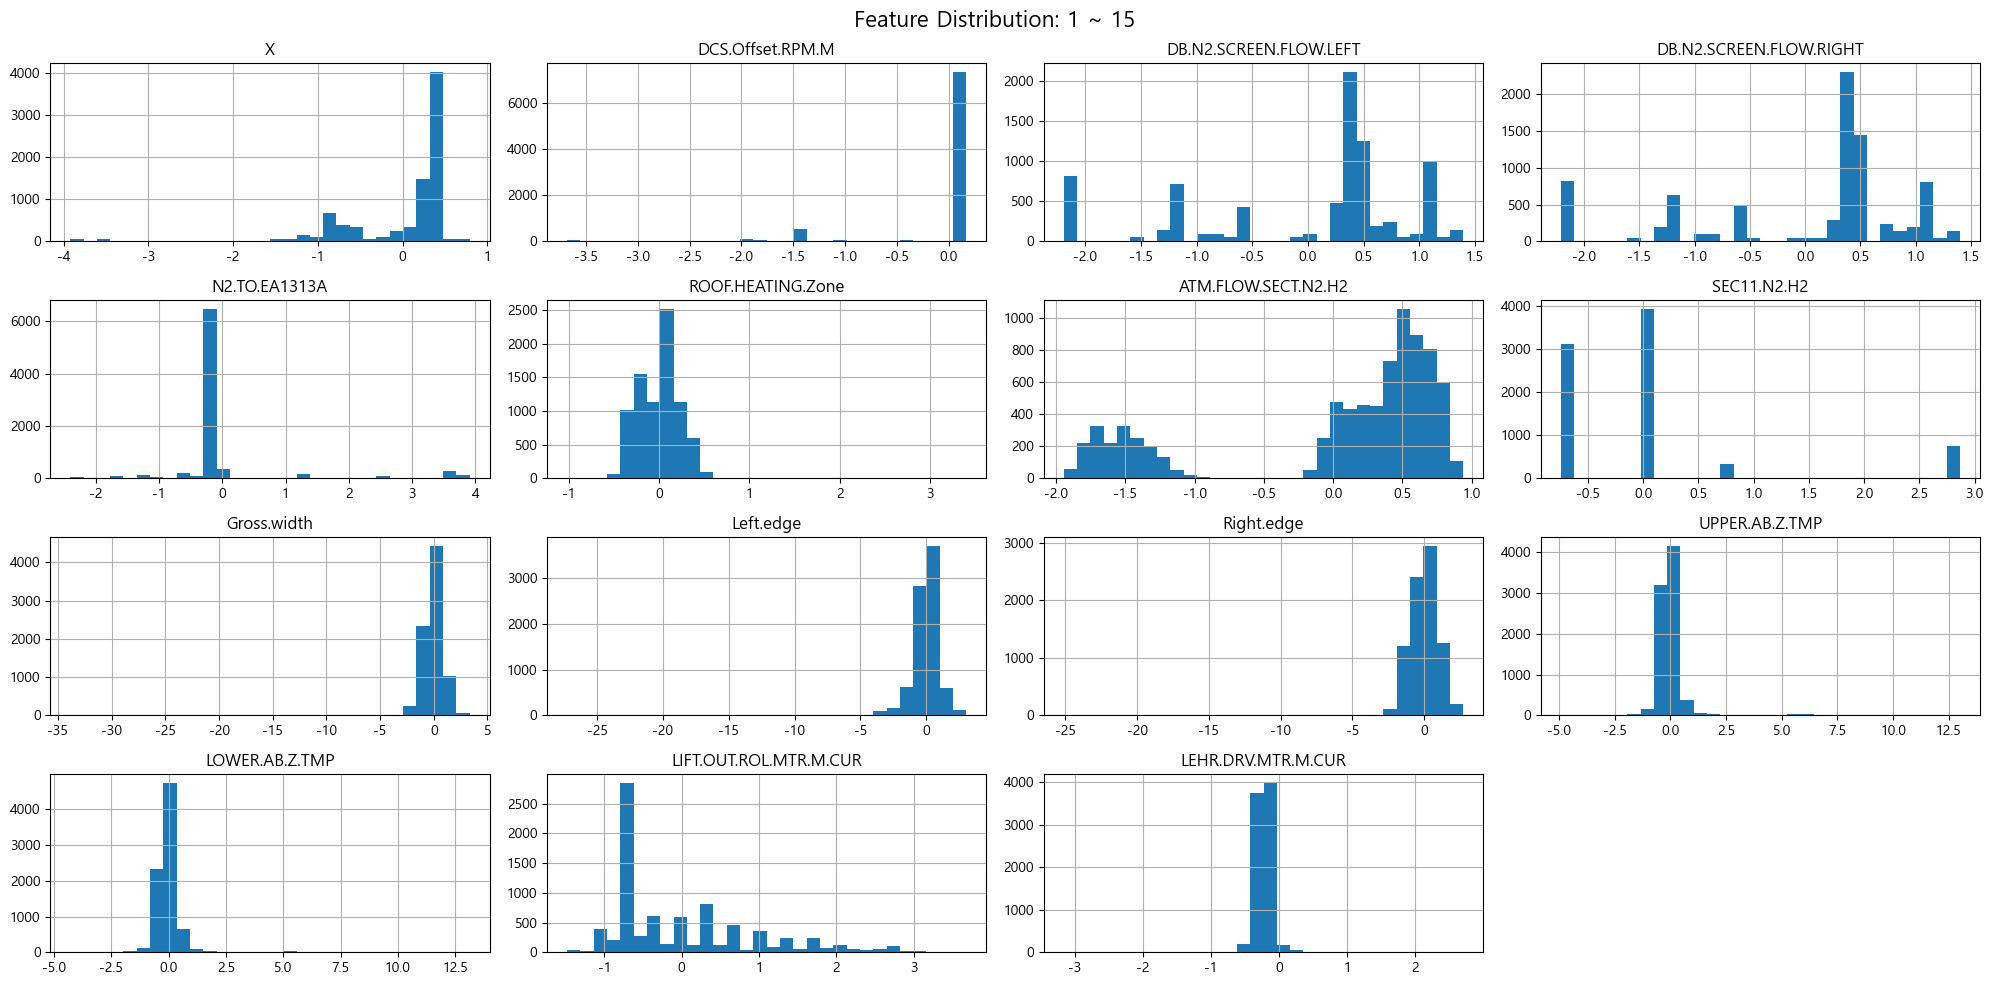

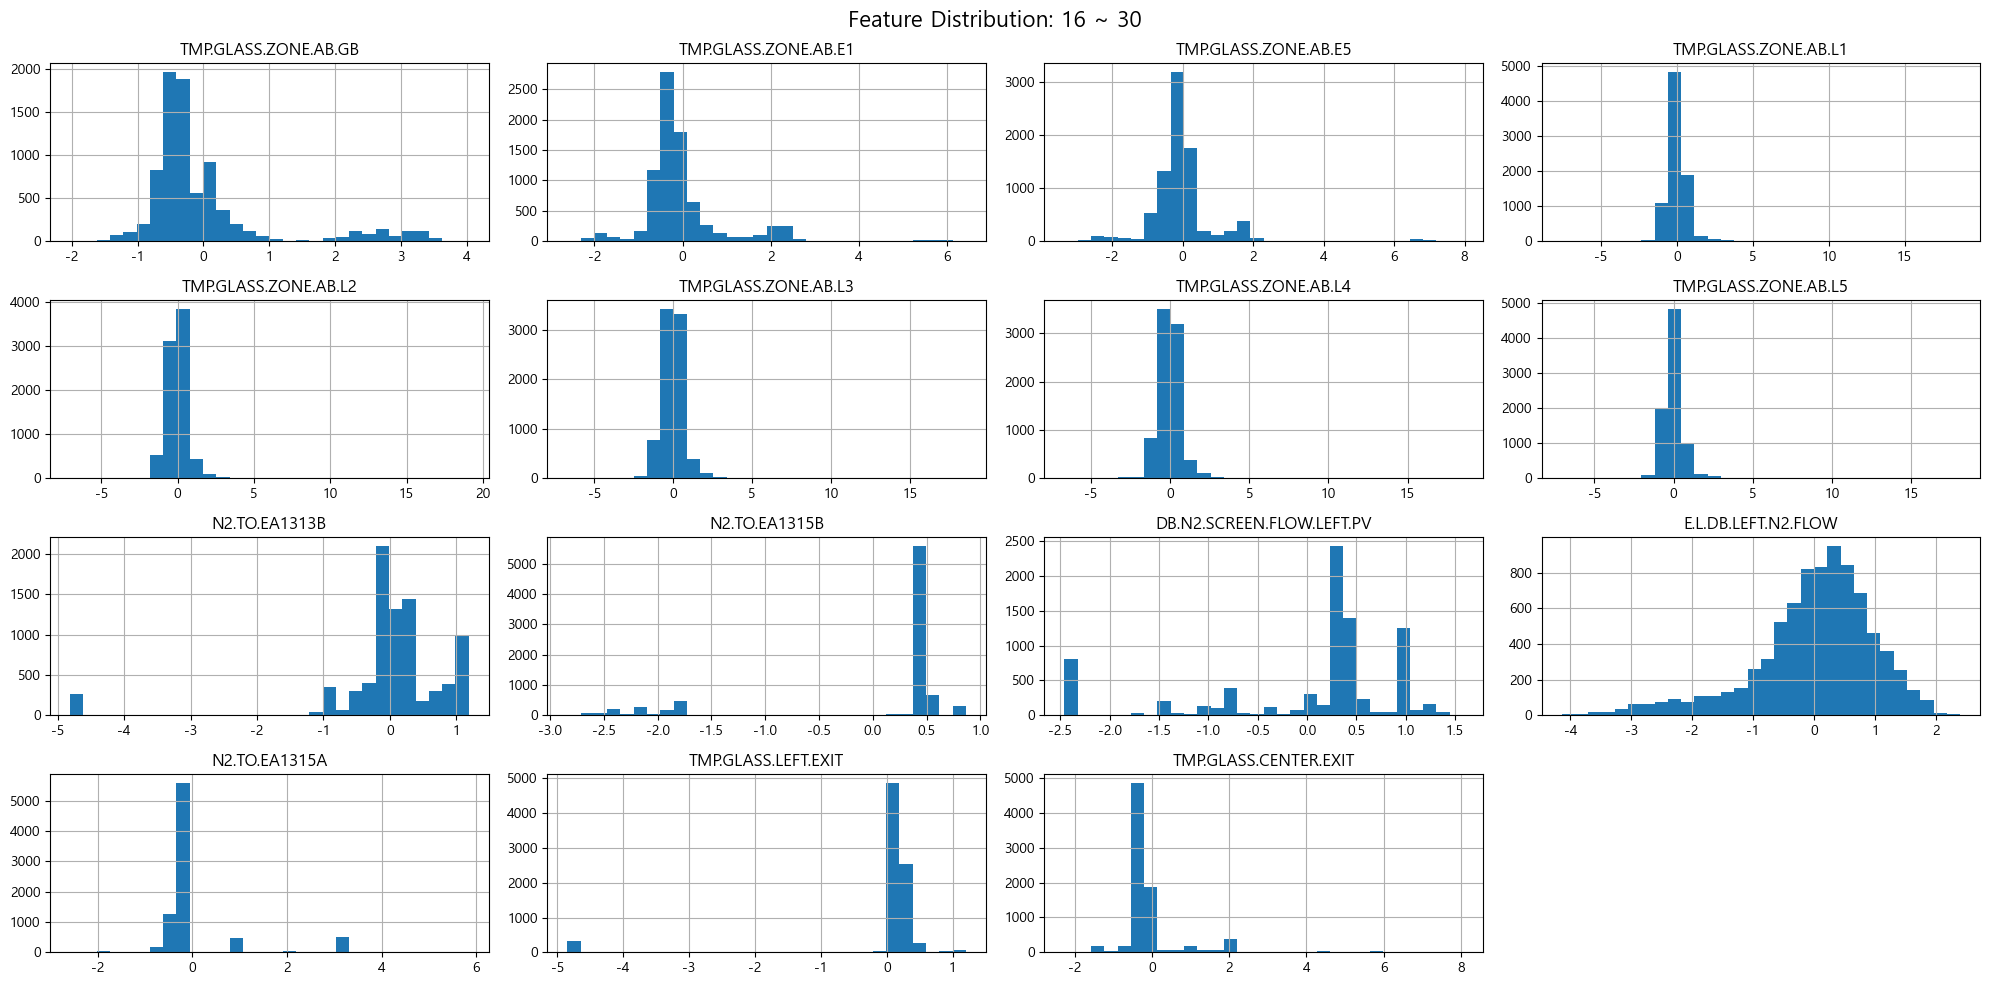

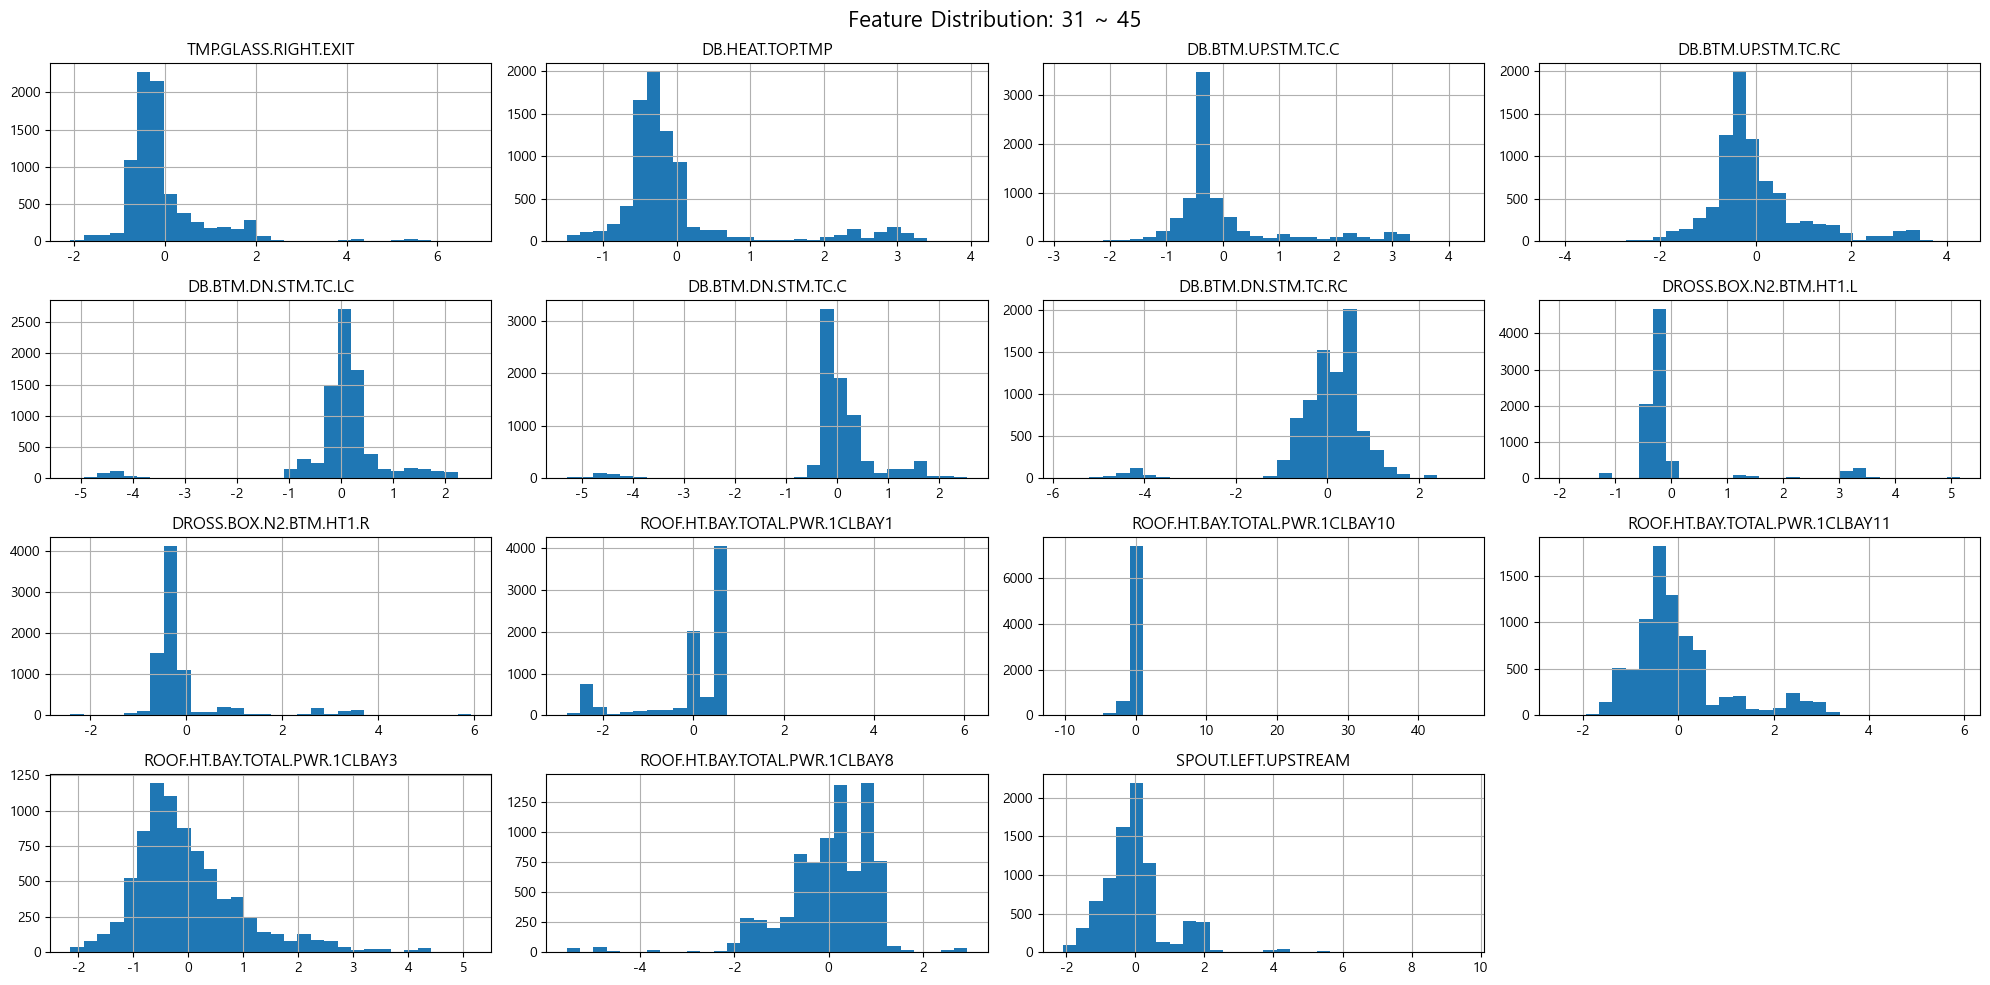

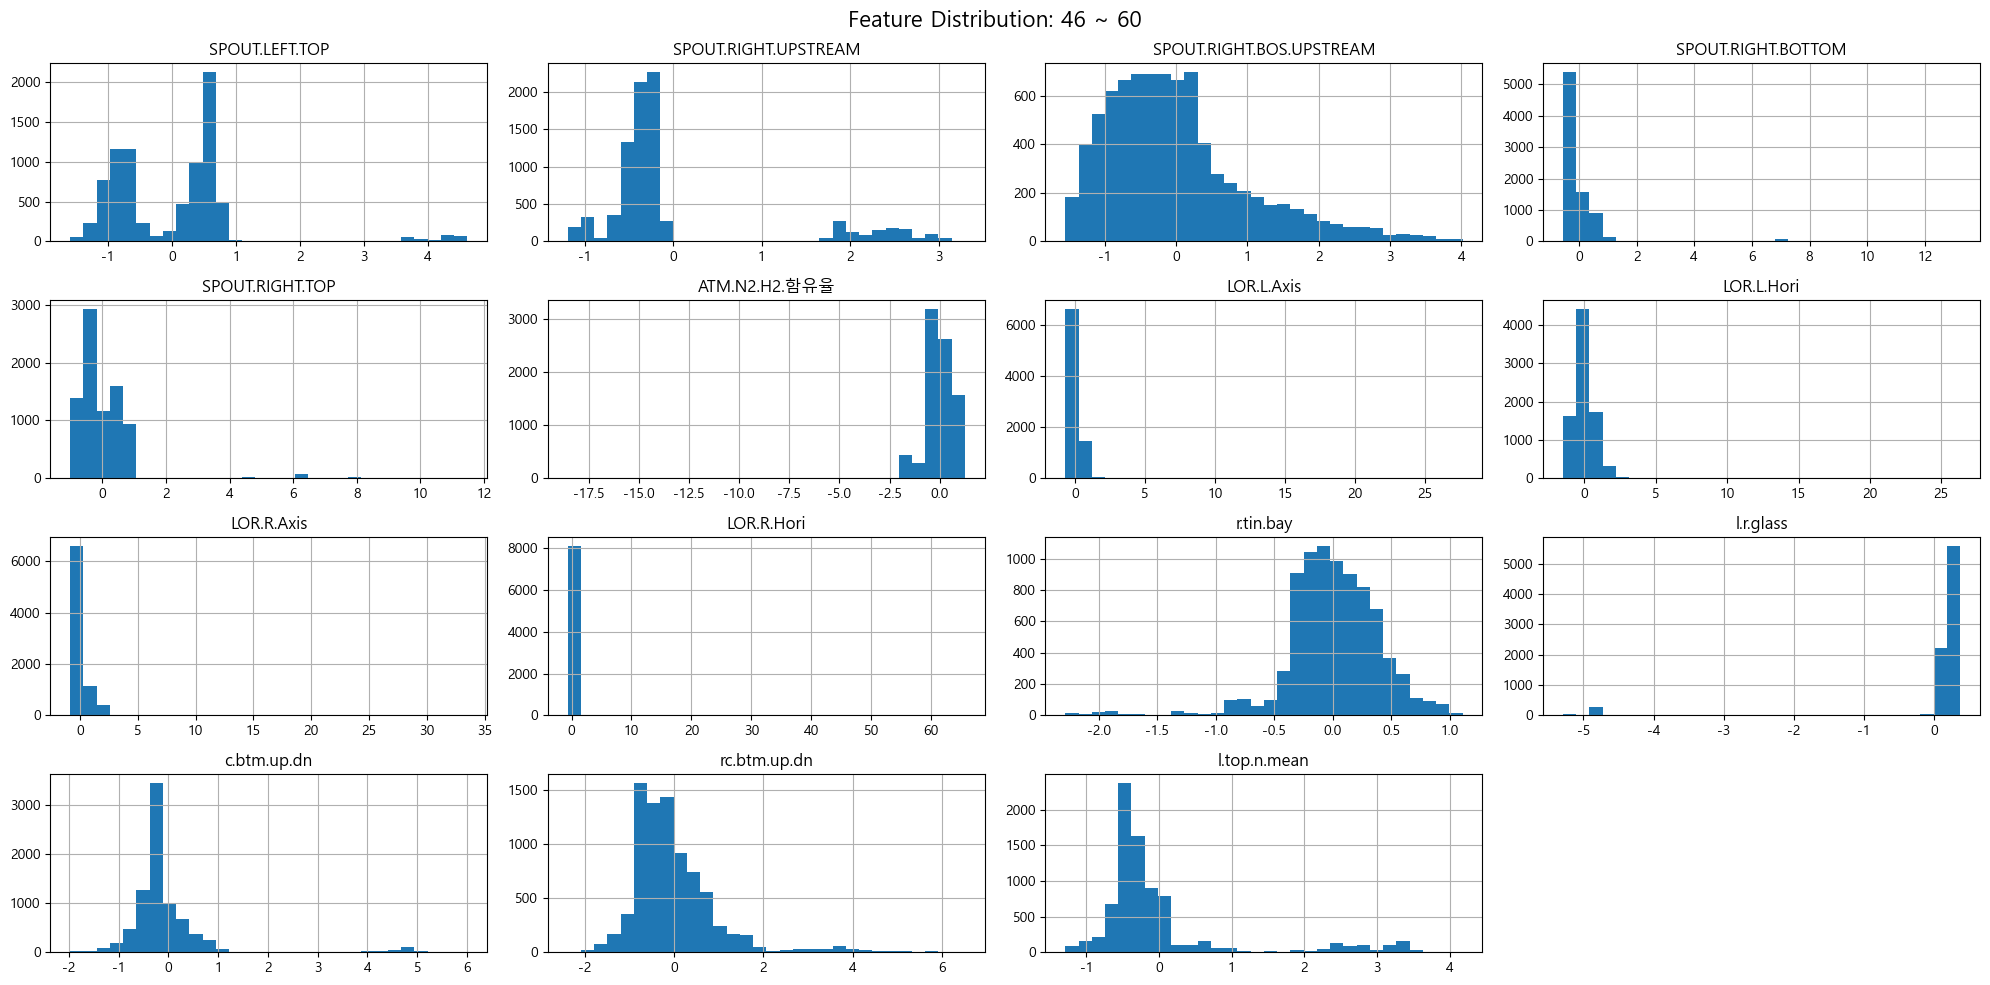

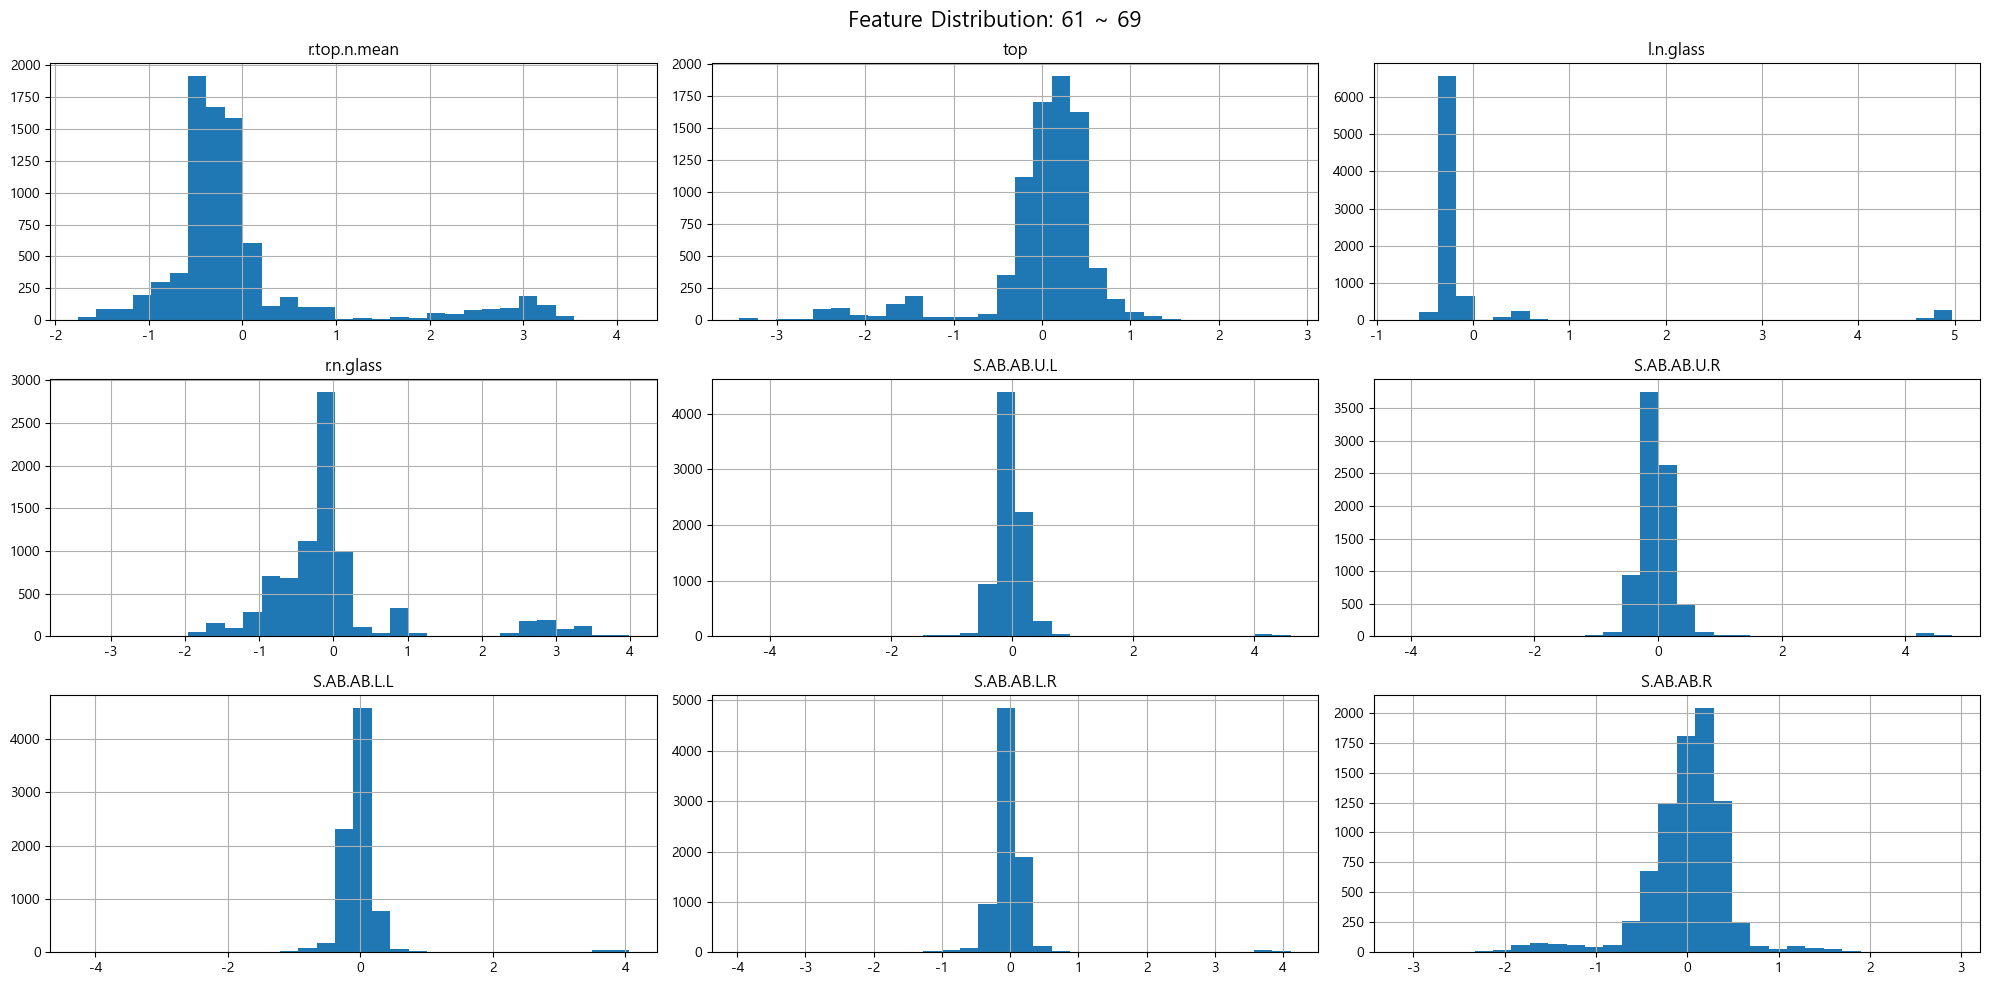

In [23]:
import matplotlib.pyplot as plt
from scipy.stats import skew

def plot_feature_distribution(df, cols, group_size=40):
    for i in range(0, len(cols), group_size):
        subset = cols[i:i+group_size]
        df[subset].hist(bins=30, figsize=(20, 10))
        plt.suptitle(f'Feature Distribution: {i+1} ~ {i+len(subset)}', fontsize=16)
        plt.tight_layout()
        plt.show()

# 왜도 큰 피처부터 시각화
skewed = feature_df.skew().sort_values(ascending=False)

skewed_feats = feature_df.apply(skew)
skewed_cols = skewed_feats[abs(skewed_feats) > 1.0].index

# 상위 30개만 확인
# plot_feature_distribution(df, skewed.head(45).index.tolist(), group_size=15)
plot_feature_distribution(df, skewed_cols.tolist(), group_size=15)


# 상위 15개 정도 심한 왜도로 확인됨

In [24]:
print(feature_df.dtypes.value_counts())

float64    194
Name: count, dtype: int64


In [25]:
# 고유값이 적은 수치형 컬럼 탐색 (예: 10개 이하)
low_cardinality_candidates = [
    col for col in feature_df.select_dtypes(include=['int64', 'float64']).columns
    if feature_df[col].nunique() <= 10
]

print("🔎 숫자지만 범주형일 수 있는 컬럼:")
print(low_cardinality_candidates)

# feature_df[['DCS.Offset.RPM.M', 'DAMP.POSITION.0.BAY.CTRL', 'DAMP.POSITION.1.BAY.CTRL', 'DAMP.POSITION.3.BAY.CTRL', 'DAMP.POSITION.4.BAY.CTRL', 'DAMP.POSITION.6.BAY.CTRL', 'DAMP.POSITION.7.BAY.CTRL', 'DAMP.POSITION.9.BAY.CTRL']].value_counts()
# feature_df[['ROOF.HEATING.Zone.1', 'ROOF.HEATING.Zone.2', 'ROOF.HEATING.Zone.3', 'ROOF.HEATING.Zone.4', 'ROOF.HEATING.Zone.9', 'ATM.FLOW.SECT.6.N2.H2', 'ATM.FLOW.SECT.7.N2.H2', 'ATM.FLOW.SECT.8.N2.H2', 'ATM.FLOW.SECT.9.N2', 'ATM.FLOW.SECT.9.N2.H2', 'ATM.FLOW.SECT.10.N2.H2', 'SEC11.N2', 'SEC11.N2.H2.9', 'TMP.TIN.BAY.4.LEFT']].value_counts()

🔎 숫자지만 범주형일 수 있는 컬럼:
['DCS.Offset.RPM.M', 'SEC11.N2', 'SEC11.N2.H2', 'UPPER.RET.Z.TMP']


In [26]:
feature_df[low_cardinality_candidates].describe()

,DCS.Offset.RPM.M,SEC11.N2,SEC11.N2.H2,UPPER.RET.Z.TMP
count,8145.000000,8145.000000,8145.000000,0.0
mean,-0.000148,-0.001575,-0.002465,NaN
std,0.551058,0.998984,0.996887,NaN
min,-3.684494,-1.624702,-0.745351,NaN
25%,0.172236,0.219432,-0.745351,NaN
50%,0.172236,0.219432,-0.022694,NaN
75%,0.172236,0.219432,-0.022694,NaN
max,0.172236,1.833049,2.867935,NaN


> ### 이상치 확인